(427, 640, 3)

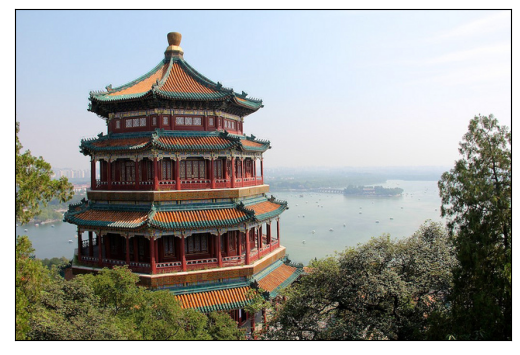

In [1]:
#loading the image dataset from sklearn library, and required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
img = load_sample_image("flower.jpg")
img2 = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img)
ax.imshow(img2)
img.shape

In [2]:
data = img/255.0 #reshape the image
data = data.reshape(427*640, 3)
data2 = img2/255.0 #reshape the image
data2 = data2.reshape(427*640, 3)
data.shape

(273280, 3)

In [3]:
def plot_pixels(data, title, colors=None,  N=10000):
    if colors is None:
        colors = data
    
    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

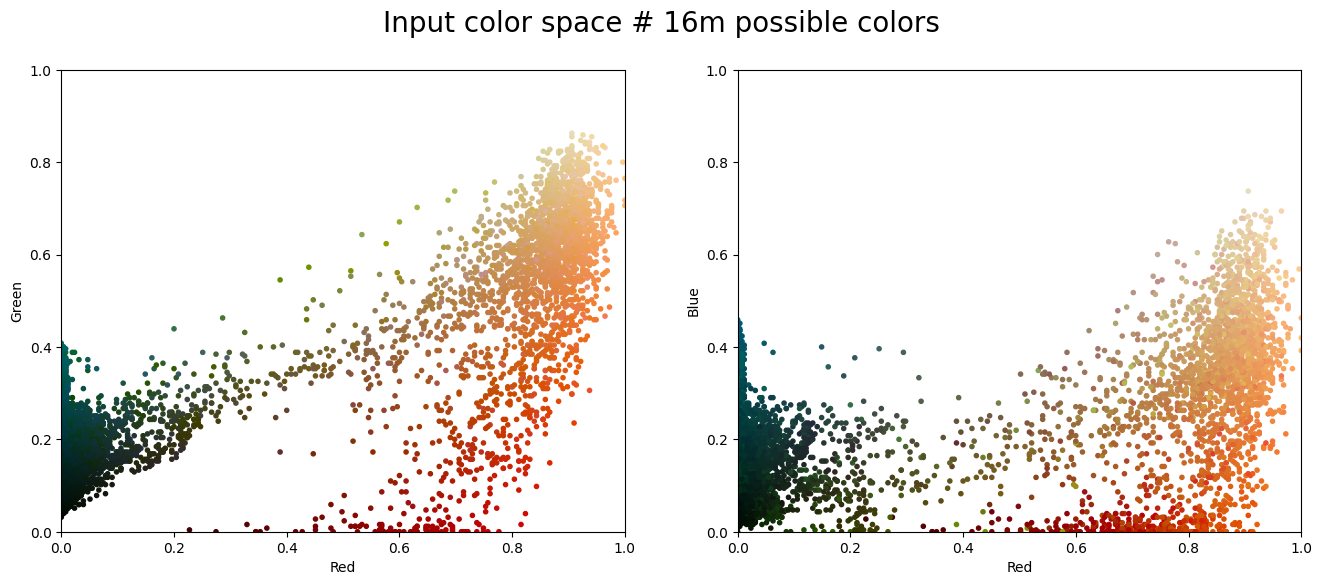

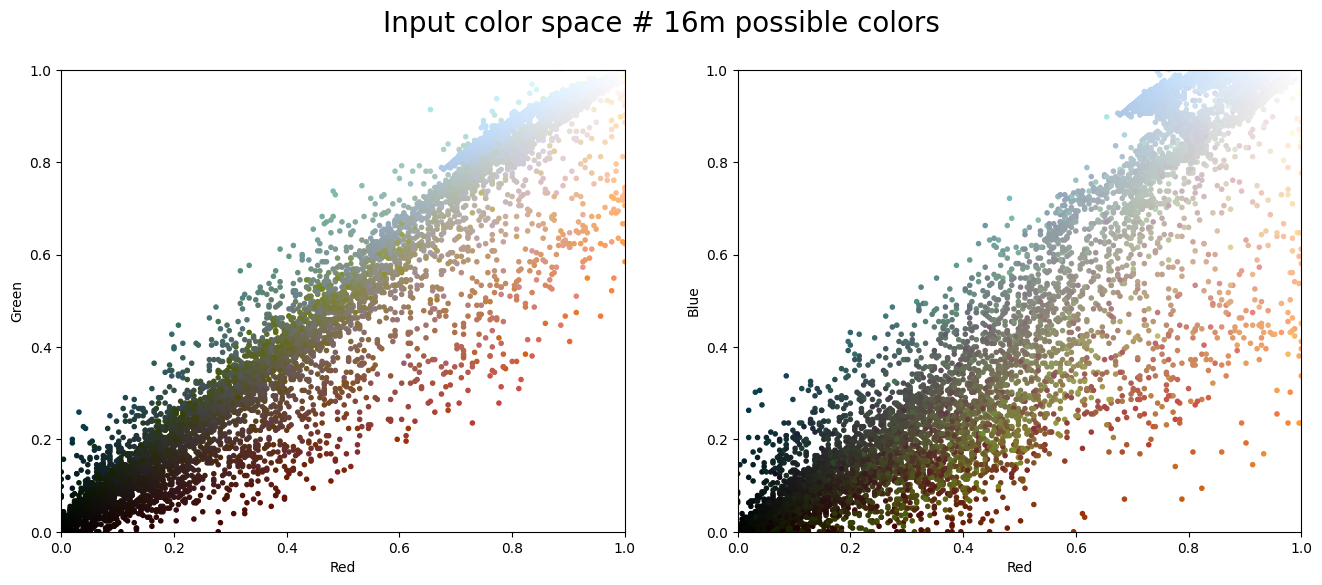

In [4]:
plot_pixels(data, title='Input color space # 16m possible colors')
plot_pixels(data2, title='Input color space # 16m possible colors')

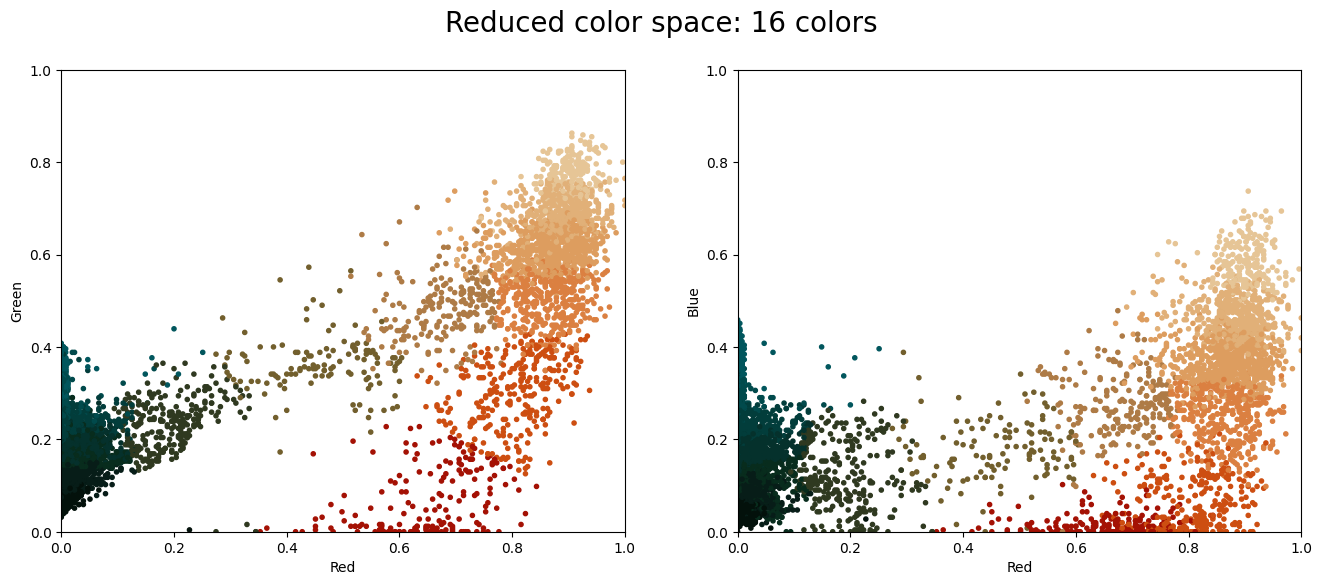

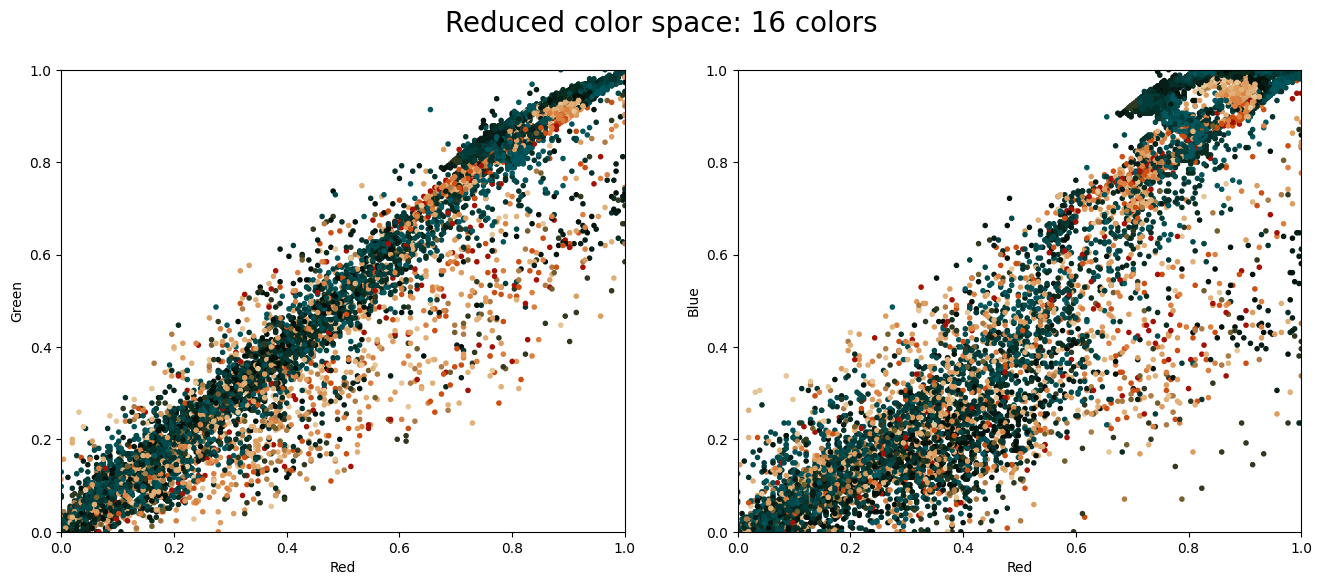

In [5]:
import warnings; warnings.simplefilter('ignore')#ignores any type of warnings

from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(16)
model.fit(data)
new_colors = model.cluster_centers_[model.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

model2 = MiniBatchKMeans(16)
model2.fit(data2)
new_colors2 = model2.cluster_centers_[model2.predict(data2)]

plot_pixels(data2, colors=new_colors, title="Reduced color space: 16 colors")

Text(0.5, 1.0, 'Recolored image')

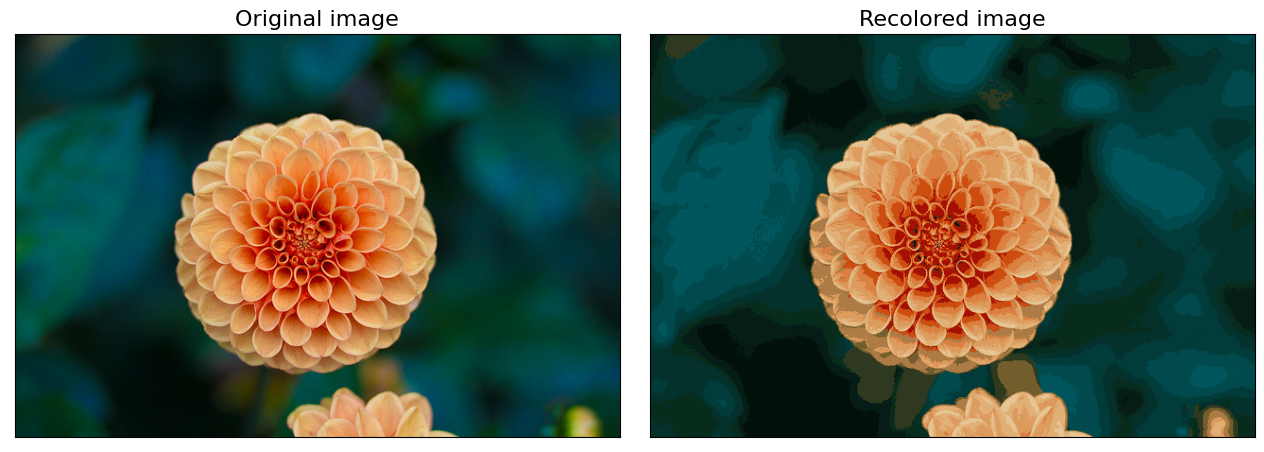

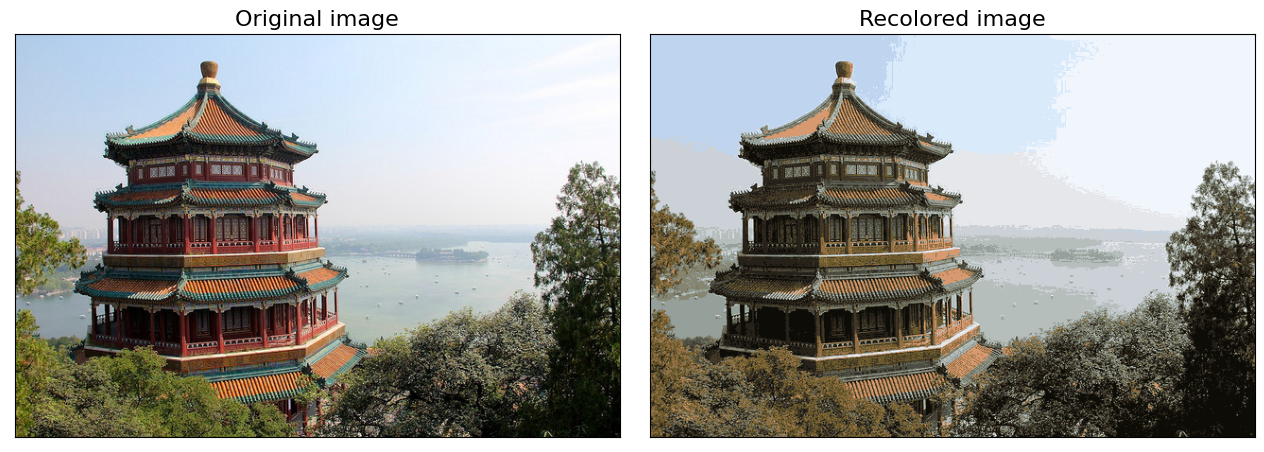

In [6]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original image', size = 16)
ax[1].imshow(img_recolored)
ax[1].set_title('Recolored image', size = 16)

img2_recolored = new_colors2.reshape(img2.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img2)
ax[0].set_title('Original image', size = 16)
ax[1].imshow(img2_recolored)
ax[1].set_title('Recolored image', size = 16)